<a href="https://colab.research.google.com/github/elmaazouziyassine/Machine_Learning_Python/blob/master/1_Regression/Polynomial%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**



### **Data Preprocessing**




In [0]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [72]:
# Import dataset
dataset = 'https://raw.githubusercontent.com/elmaazouziyassine/Machine_Learning_Python/master/1_Regression/positions_salaries.csv'
data = pd.read_csv(dataset)
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [73]:
data.count()

Position    10
Level       10
Salary      10
dtype: int64

In [74]:
# Separate Features Variables from Target Variable
X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values
X, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

Note : 
- Regarding the nature of the dataset, we cannot split the dataset. All the recors has to be included.
- No need for Feature Scaling.

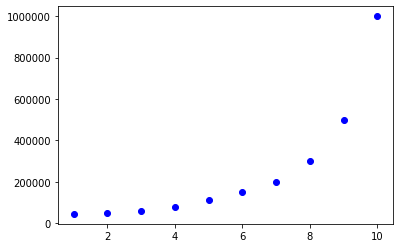

In [75]:
plt.scatter(X, y, c = 'blue')

### **Apply the model to the Dataset**



Fit Linear Regression to the Dataset (just for testing purposes)

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fit Polynomial Regresstion to the Dataset 

In [77]:
# based on the matrix X, create the variable X^2, X^3, X^4 ,...
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Predict the results**


In [0]:
# Predict the Test Set resutls 
y_pred_1 = lin_reg.predict(X)
y_pred_2 = lin_reg_2.predict(poly_reg.fit_transform(X))

### **Visualize the results**

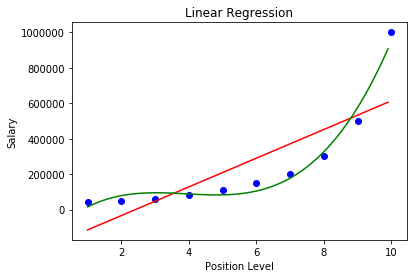

In [80]:
# Visualize linear regression results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, c = 'blue')
plt.plot(X_grid, lin_reg.predict(X_grid), c = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), c = 'green')

plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### **Test the performance of the model**

Predict a new result with Linear & Polynamial Regressions

In [81]:
# Predict the salary associated to level 6.5 using linear regression
a= lin_reg.predict([[6.5]]) 

# Predict the salary associated to level 6.5 using linear regression
b= lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

a,b 


(array([330378.78787879]), array([133259.46969697]))